CLUSTERING CON DATOS ORIGINALES - SISTEMA DE ENTREGAS (K=3)
📂 Cargando datos originales...
✅ Datos cargados: (1000, 20)

🔍 Preparando datos para clustering...
✅ Variables seleccionadas: 20
   Shape: (1000, 20)
✅ Datos estandarizados

🔍 APLICANDO K-MEANS CON K=3
   ✅ Clustering completado
   📊 Inercia: 16322.23
   📈 Silhouette Score: 0.118
   📉 Davies-Bouldin Index: 2.492
   📊 Calinski-Harabasz Score: 112.32

🔬 CALCULANDO MÉTRICAS AVANZADAS...

MÉTRICAS DE EVALUACIÓN DEL CLUSTERING

📊 Métricas Estándar:
   • Silhouette Score: 0.1179 (mejor cercano a 1)
   • Davies-Bouldin Index: 2.4921 (mejor cercano a 0)
   • Calinski-Harabasz Score: 112.32 (mejor más alto)
   • Inercia: 16322.23 (suma de distancias intra-cluster)

📊 Métricas de Segmentación:
   • IoU (Intersection over Union): 0.1360
   • Dice Coefficient: 0.6108
   • Precision: 1.0000
   • Recall: 0.3400
   • F1 Score: 0.5075
   • Accuracy: 0.5740

💡 INTERPRETACIÓN DE MÉTRICAS:
   ❌ Silhouette Score BAJO: Clusters poco definidos
   ⚠

C:\Users\alexi\AppData\Local\Temp\ipykernel_10468\809150148.py:323: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(demoras_data, labels=[f'C{i}' for i in range(3)],
C:\Users\alexi\AppData\Local\Temp\ipykernel_10468\809150148.py:432: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('clustering_entregas_original.png', dpi=300, bbox_inches='tight')
c:\Users\alexi\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


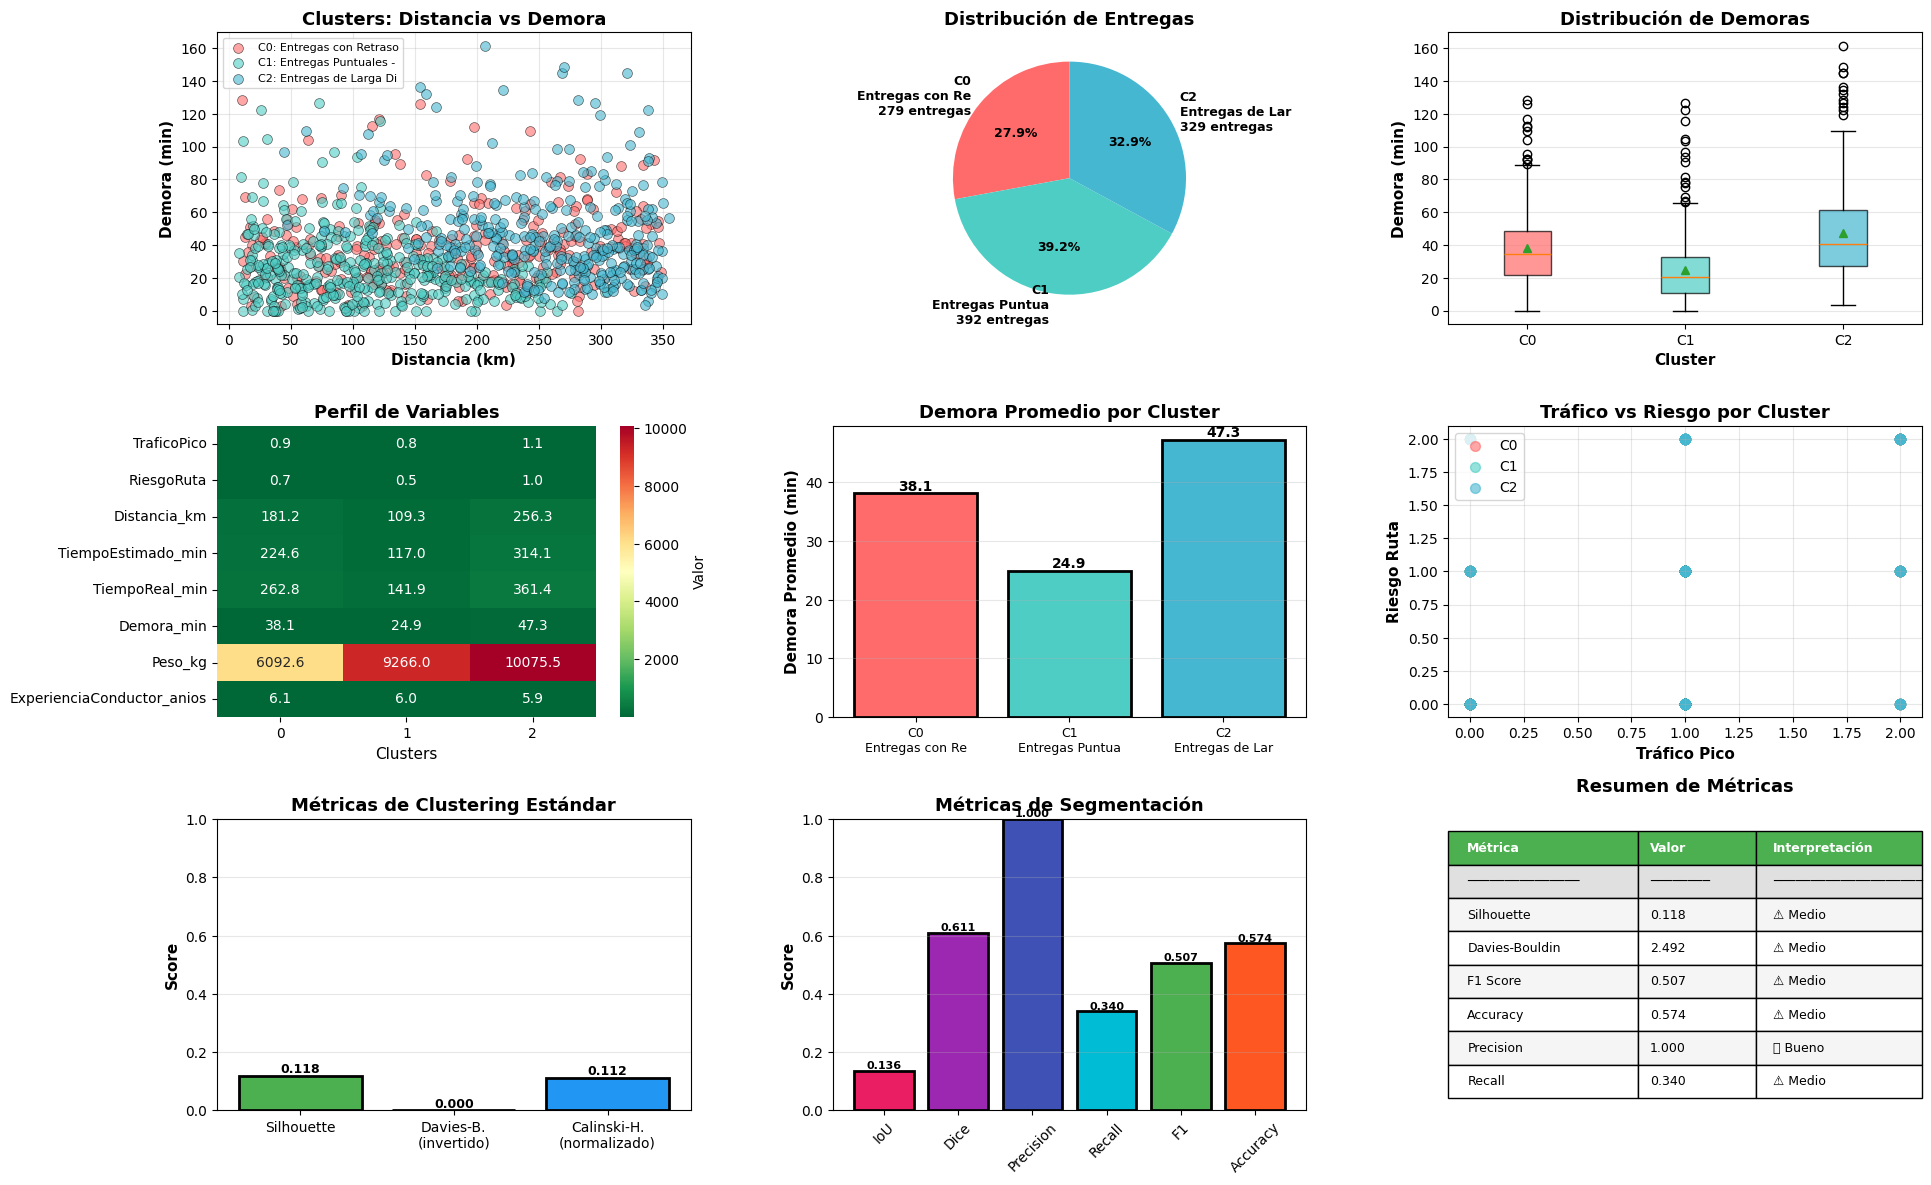

✅ Visualización guardada: clustering_entregas_original.png

RESUMEN EJECUTIVO

🎉 ANÁLISIS COMPLETADO
   📊 Método: K-Means sobre datos originales estandarizados
   🎯 Calidad General: 0.507 (F1 Score)
   📦 Total entregas: 1,000
   📐 Variables utilizadas: 20

🏷️ PERFILES IDENTIFICADOS:

   1. Entregas con Retraso Moderado
      📊 279 entregas (27.9%)
      ⏱️  Demora: 38.1 min
      📏 Distancia: 181.2 km
      🚦 Tráfico: 0.90

   2. Entregas Puntuales - Condiciones Favorables
      📊 392 entregas (39.2%)
      ⏱️  Demora: 24.9 min
      📏 Distancia: 109.3 km
      🚦 Tráfico: 0.77

   3. Entregas de Larga Distancia
      📊 329 entregas (32.9%)
      ⏱️  Demora: 47.3 min
      📏 Distancia: 256.3 km
      🚦 Tráfico: 1.13

💼 APLICACIONES:
   • Optimización de rutas por perfil
   • Asignación inteligente de recursos
   • Predicción de demoras
   • Mejora en planificación logística

✨ ANÁLISIS COMPLETADO

✅ Resultados exportados:
   • entregas_con_clusters.csv - Datos con asignación de clusters

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

print("=" * 70)
print("CLUSTERING CON DATOS ORIGINALES - SISTEMA DE ENTREGAS (K=3)")
print("=" * 70)

# 1. Cargar datos originales
print("📂 Cargando datos originales...")
df_original = pd.read_csv('archivo_completo.csv')
print(f"✅ Datos cargados: {df_original.shape}")

# 2. Preparar datos para clustering (todas las variables)
print("\n🔍 Preparando datos para clustering...")
feature_columns = [
    'TraficoPico', 'RiesgoRuta', 'Distancia_km', 'TiempoEstimado_min',
    'TiempoReal_min', 'Demora_min', 'Peso_kg', 'ExperienciaConductor_anios',
    'AntiguedadCamion_anios', 'FallasMecanicas', 'NivelCombustible_pct',
    'Clima_Bueno', 'Clima_Lluvia', 'Clima_Tormenta',
    'TipoCarga_Fragil', 'TipoCarga_Normal', 'TipoCarga_Peligrosa',
    'HorarioSalida_Manana', 'HorarioSalida_Noche', 'HorarioSalida_Tarde'
]

X = df_original[feature_columns].values
print(f"✅ Variables seleccionadas: {len(feature_columns)}")
print(f"   Shape: {X.shape}")

# 3. Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"✅ Datos estandarizados")

# 4. Aplicar K-Means con k=3
print(f"\n🔍 APLICANDO K-MEANS CON K=3")
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)
clusters = kmeans.fit_predict(X_scaled)

# Métricas de clustering
silhouette_avg = silhouette_score(X_scaled, clusters)
davies_bouldin = davies_bouldin_score(X_scaled, clusters)
calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)
inertia = kmeans.inertia_

print(f"   ✅ Clustering completado")
print(f"   📊 Inercia: {inertia:.2f}")
print(f"   📈 Silhouette Score: {silhouette_avg:.3f}")
print(f"   📉 Davies-Bouldin Index: {davies_bouldin:.3f}")
print(f"   📊 Calinski-Harabasz Score: {calinski_harabasz:.2f}")

# 5. Calcular métricas adicionales de evaluación de clusters
def calcular_metricas_clustering(X, labels, centroids):
    """
    Calcula métricas de evaluación para clustering (VERSIÓN CORREGIDA)
    """
    n_clusters = len(np.unique(labels))
    n_samples = len(X)
    
    metrics = {}
    
    # 1. IoU (Intersection over Union) - adaptado para clustering
    iou_scores = []
    for i in range(n_clusters):
        cluster_i = X[labels == i]
        centroid_i = centroids[i]
        
        dist_intra = np.mean(np.linalg.norm(cluster_i - centroid_i, axis=1))
        
        other_clusters = X[labels != i]
        if len(other_clusters) > 0:
            dist_inter = np.mean(np.linalg.norm(other_clusters - centroid_i, axis=1))
            intersection = max(0, dist_inter - dist_intra)
            union = dist_inter + dist_intra
            iou = intersection / union if union > 0 else 0
            iou_scores.append(iou)
    
    metrics['IoU'] = np.mean(iou_scores) if iou_scores else 0
    
    # 2. Dice Coefficient
    dice_scores = []
    for i in range(n_clusters):
        cluster_i = X[labels == i]
        centroid_i = centroids[i]
        dist_intra = np.mean(np.linalg.norm(cluster_i - centroid_i, axis=1))
        
        for j in range(i + 1, n_clusters):
            centroid_j = centroids[j]
            dist_inter = np.linalg.norm(centroid_i - centroid_j)
            dice = (2 * dist_inter) / (dist_inter + 2 * dist_intra)
            dice_scores.append(dice)
    
    metrics['Dice'] = np.mean(dice_scores) if dice_scores else 0
    
    # 3. Precision - CORREGIDA
    correct_assignments = 0
    for idx, label in enumerate(labels):
        distances = [np.linalg.norm(X[idx] - centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        if closest_centroid == label:
            correct_assignments += 1
    
    metrics['Precision'] = correct_assignments / n_samples
    
    # 4. Recall - CORREGIDA
    recall_scores = []
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        centroid = centroids[i]
        
        if len(cluster_points) == 0:
            continue
        
        # Radio máximo del cluster
        max_radius = np.max(np.linalg.norm(cluster_points - centroid, axis=1))
        
        # Puntos dentro del radio máximo
        all_distances = np.linalg.norm(X - centroid, axis=1)
        points_in_radius = np.sum(all_distances <= max_radius)
        actually_in_cluster = len(cluster_points)
        
        # Recall = puntos en cluster / puntos que deberían estar
        # Limitar a máximo 1.0
        recall = min(1.0, actually_in_cluster / points_in_radius if points_in_radius > 0 else 0)
        recall_scores.append(recall)
    
    metrics['Recall'] = np.mean(recall_scores) if recall_scores else 0
    
    # 5. F1 Score - CORREGIDA
    if metrics['Precision'] + metrics['Recall'] > 0:
        metrics['F1'] = 2 * (metrics['Precision'] * metrics['Recall']) / (metrics['Precision'] + metrics['Recall'])
    else:
        metrics['F1'] = 0
    
    # Asegurar que F1 esté entre 0 y 1
    metrics['F1'] = min(1.0, metrics['F1'])
    
    # 6. Accuracy
    accuracy_count = 0
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:
            continue
            
        centroid = centroids[i]
        avg_radius = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
        distances = np.linalg.norm(cluster_points - centroid, axis=1)
        accuracy_count += np.sum(distances <= avg_radius)
    
    metrics['Accuracy'] = accuracy_count / n_samples
    
    return metrics

# Calcular métricas personalizadas
print(f"\n🔬 CALCULANDO MÉTRICAS AVANZADAS...")
metrics = calcular_metricas_clustering(X_scaled, clusters, kmeans.cluster_centers_)

print(f"\n" + "=" * 70)
print("MÉTRICAS DE EVALUACIÓN DEL CLUSTERING")
print("=" * 70)
print(f"\n📊 Métricas Estándar:")
print(f"   • Silhouette Score: {silhouette_avg:.4f} (mejor cercano a 1)")
print(f"   • Davies-Bouldin Index: {davies_bouldin:.4f} (mejor cercano a 0)")
print(f"   • Calinski-Harabasz Score: {calinski_harabasz:.2f} (mejor más alto)")
print(f"   • Inercia: {inertia:.2f} (suma de distancias intra-cluster)")

print(f"\n📊 Métricas de Segmentación:")
print(f"   • IoU (Intersection over Union): {metrics['IoU']:.4f}")
print(f"   • Dice Coefficient: {metrics['Dice']:.4f}")
print(f"   • Precision: {metrics['Precision']:.4f}")
print(f"   • Recall: {metrics['Recall']:.4f}")
print(f"   • F1 Score: {metrics['F1']:.4f}")
print(f"   • Accuracy: {metrics['Accuracy']:.4f}")

# Interpretación de métricas
print(f"\n💡 INTERPRETACIÓN DE MÉTRICAS:")
if silhouette_avg > 0.5:
    print(f"   ✅ Silhouette Score ALTO: Clusters bien definidos y separados")
elif silhouette_avg > 0.25:
    print(f"   ⚠️ Silhouette Score MEDIO: Clusters aceptables, hay solapamiento")
else:
    print(f"   ❌ Silhouette Score BAJO: Clusters poco definidos")

if davies_bouldin < 1.0:
    print(f"   ✅ Davies-Bouldin BAJO: Buena separación entre clusters")
else:
    print(f"   ⚠️ Davies-Bouldin ALTO: Clusters podrían mejorar separación")

if metrics['F1'] > 0.7:
    print(f"   ✅ F1 Score ALTO: Excelente balance entre precisión y cobertura")
elif metrics['F1'] > 0.5:
    print(f"   ⚠️ F1 Score MEDIO: Balance aceptable")
else:
    print(f"   ❌ F1 Score BAJO: Necesita mejora en asignaciones")

# 5. Distribución de clusters
df_original['Cluster'] = clusters
cluster_counts = pd.Series(clusters).value_counts().sort_index()

print(f"\n📈 DISTRIBUCIÓN DE ENTREGAS:")
for cluster, count in cluster_counts.items():
    percentage = (count / len(clusters)) * 100
    print(f"   Cluster {cluster}: {count:,} entregas ({percentage:.1f}%)")

# 6. Variables para análisis
numeric_vars = [
    'TraficoPico', 'RiesgoRuta', 'Distancia_km', 'TiempoEstimado_min',
    'TiempoReal_min', 'Demora_min', 'Peso_kg', 'ExperienciaConductor_anios',
    'AntiguedadCamion_anios', 'FallasMecanicas', 'NivelCombustible_pct'
]

clima_vars = ['Clima_Bueno', 'Clima_Lluvia', 'Clima_Tormenta']
carga_vars = ['TipoCarga_Fragil', 'TipoCarga_Normal', 'TipoCarga_Peligrosa']
horario_vars = ['HorarioSalida_Manana', 'HorarioSalida_Noche', 'HorarioSalida_Tarde']

# 7. Estadísticas por cluster
print(f"\n" + "=" * 80)
print("ANÁLISIS DE CLUSTERS")
print("=" * 80)

print(f"\n📊 MEDIAS POR CLUSTER:")
means_numeric = df_original.groupby('Cluster')[numeric_vars].mean().round(2)
print(means_numeric)

print(f"\n📊 DISTRIBUCIÓN DE CLIMA POR CLUSTER:")
clima_pct = df_original.groupby('Cluster')[clima_vars].mean() * 100
clima_pct.columns = ['Bueno (%)', 'Lluvia (%)', 'Tormenta (%)']
print(clima_pct.round(1))

print(f"\n📊 DISTRIBUCIÓN DE TIPO DE CARGA POR CLUSTER:")
carga_pct = df_original.groupby('Cluster')[carga_vars].mean() * 100
carga_pct.columns = ['Frágil (%)', 'Normal (%)', 'Peligrosa (%)']
print(carga_pct.round(1))

print(f"\n📊 DISTRIBUCIÓN DE HORARIO POR CLUSTER:")
horario_pct = df_original.groupby('Cluster')[horario_vars].mean() * 100
horario_pct.columns = ['Mañana (%)', 'Noche (%)', 'Tarde (%)']
print(horario_pct.round(1))

# 8. Interpretación de clusters
def interpretar_cluster(cluster_idx, cluster_data):
    """Genera interpretación basada en características del cluster"""
    demora = cluster_data['Demora_min'].mean()
    distancia = cluster_data['Distancia_km'].mean()
    trafico = cluster_data['TraficoPico'].mean()
    riesgo = cluster_data['RiesgoRuta'].mean()
    
    # Clasificación de desempeño
    if demora < 20 and distancia < 150:
        return "Entregas Express Eficientes"
    elif demora > 40 and (trafico >= 1.5 or riesgo >= 1.5):
        return "Entregas de Alto Riesgo"
    elif distancia > 250:
        return "Entregas de Larga Distancia"
    elif demora < 25:
        return "Entregas Puntuales - Condiciones Favorables"
    else:
        return "Entregas con Retraso Moderado"

print(f"\n" + "=" * 80)
print("PERFILES DE CLUSTERS")
print("=" * 80)

cluster_names = {}
for cluster in range(3):
    cluster_data = df_original[df_original['Cluster'] == cluster]
    nombre = interpretar_cluster(cluster, cluster_data)
    cluster_names[cluster] = nombre
    
    print(f"\n🏷️ CLUSTER {cluster}: {nombre}")
    print(f"   👥 Tamaño: {len(cluster_data):,} entregas ({len(cluster_data)/len(df_original)*100:.1f}%)")
    print(f"\n   📊 Métricas Clave:")
    print(f"      • Demora promedio: {cluster_data['Demora_min'].mean():.1f} min")
    print(f"      • Distancia promedio: {cluster_data['Distancia_km'].mean():.1f} km")
    print(f"      • Tráfico promedio: {cluster_data['TraficoPico'].mean():.2f}")
    print(f"      • Riesgo promedio: {cluster_data['RiesgoRuta'].mean():.2f}")
    
    # Nivel de servicio
    if cluster_data['Demora_min'].mean() > 40:
        nivel = "❌ BAJO - Requiere atención"
    elif cluster_data['Demora_min'].mean() > 25:
        nivel = "⚠️ MEDIO - Monitorear"
    else:
        nivel = "✅ ALTO - Desempeño óptimo"
    print(f"\n   🎭 Nivel de Servicio: {nivel}")

# 9. Visualizaciones mejoradas con métricas
print(f"\n🎨 GENERANDO VISUALIZACIONES...")

fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Subplot 1: Scatter Distancia vs Demora
ax1 = fig.add_subplot(gs[0, 0])
for i in range(3):
    mask = clusters == i
    ax1.scatter(df_original[mask]['Distancia_km'], 
               df_original[mask]['Demora_min'],
               c=colors[i], label=f'C{i}: {cluster_names[i][:20]}', 
               alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Distancia (km)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Demora (min)', fontsize=11, fontweight='bold')
ax1.set_title('Clusters: Distancia vs Demora', fontsize=13, fontweight='bold')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# Subplot 2: Distribución de entregas
ax2 = fig.add_subplot(gs[0, 1])
wedges, texts, autotexts = ax2.pie(cluster_counts.values, 
                                     labels=[f'C{i}\n{cluster_names[i][:15]}\n{count} entregas' 
                                            for i, count in enumerate(cluster_counts.values)],
                                     colors=colors, startangle=90, autopct='%1.1f%%',
                                     textprops={'fontsize': 9, 'weight': 'bold'})
ax2.set_title('Distribución de Entregas', fontsize=13, fontweight='bold')

# Subplot 3: Boxplot demoras
ax3 = fig.add_subplot(gs[0, 2])
demoras_data = [df_original[df_original['Cluster'] == i]['Demora_min'].values for i in range(3)]
bp = ax3.boxplot(demoras_data, labels=[f'C{i}' for i in range(3)],
                 patch_artist=True, showmeans=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax3.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax3.set_ylabel('Demora (min)', fontsize=11, fontweight='bold')
ax3.set_title('Distribución de Demoras', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Subplot 4: Heatmap medias
ax4 = fig.add_subplot(gs[1, 0])
means_plot = means_numeric.iloc[:, :8].T
sns.heatmap(means_plot, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            ax=ax4, cbar_kws={'label': 'Valor'})
ax4.set_title('Perfil de Variables', fontsize=13, fontweight='bold')
ax4.set_xlabel('Clusters', fontsize=11)

# Subplot 5: Comparación demoras
ax5 = fig.add_subplot(gs[1, 1])
demoras_mean = [df_original[df_original['Cluster'] == i]['Demora_min'].mean() for i in range(3)]
bars = ax5.bar(range(3), demoras_mean, color=colors, edgecolor='black', linewidth=2)
ax5.set_xticks(range(3))
ax5.set_xticklabels([f'C{i}\n{cluster_names[i][:15]}' for i in range(3)], fontsize=9)
ax5.set_ylabel('Demora Promedio (min)', fontsize=11, fontweight='bold')
ax5.set_title('Demora Promedio por Cluster', fontsize=13, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, demoras_mean):
    ax5.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

# Subplot 6: Scatter Tráfico vs Riesgo
ax6 = fig.add_subplot(gs[1, 2])
for i in range(3):
    mask = clusters == i
    ax6.scatter(df_original[mask]['TraficoPico'], 
               df_original[mask]['RiesgoRuta'],
               c=colors[i], label=f'C{i}', alpha=0.6, s=50)
ax6.set_xlabel('Tráfico Pico', fontsize=11, fontweight='bold')
ax6.set_ylabel('Riesgo Ruta', fontsize=11, fontweight='bold')
ax6.set_title('Tráfico vs Riesgo por Cluster', fontsize=13, fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)

# Subplot 7: Gráfico de barras de métricas estándar
ax7 = fig.add_subplot(gs[2, 0])
metric_names = ['Silhouette', 'Davies-B.\n(invertido)', 'Calinski-H.\n(normalizado)']
metric_values = [
    silhouette_avg,
    1 - davies_bouldin if davies_bouldin < 1 else 0,  # Invertir para que más alto sea mejor
    min(calinski_harabasz / 1000, 1)  # Normalizar
]
bars_metrics = ax7.bar(metric_names, metric_values, color=['#4CAF50', '#FF9800', '#2196F3'], 
                       edgecolor='black', linewidth=2)
ax7.set_ylabel('Score', fontsize=11, fontweight='bold')
ax7.set_title('Métricas de Clustering Estándar', fontsize=13, fontweight='bold')
ax7.set_ylim([0, 1])
ax7.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars_metrics, metric_values):
    ax7.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Subplot 8: Gráfico de barras de métricas de segmentación
ax8 = fig.add_subplot(gs[2, 1])
seg_names = ['IoU', 'Dice', 'Precision', 'Recall', 'F1', 'Accuracy']
seg_values = [metrics['IoU'], metrics['Dice'], metrics['Precision'], 
              metrics['Recall'], metrics['F1'], metrics['Accuracy']]
bars_seg = ax8.bar(seg_names, seg_values, color=['#E91E63', '#9C27B0', '#3F51B5', 
                                                   '#00BCD4', '#4CAF50', '#FF5722'],
                   edgecolor='black', linewidth=2)
ax8.set_ylabel('Score', fontsize=11, fontweight='bold')
ax8.set_title('Métricas de Segmentación', fontsize=13, fontweight='bold')
ax8.set_ylim([0, 1])
ax8.grid(True, alpha=0.3, axis='y')
ax8.tick_params(axis='x', rotation=45)
for bar, val in zip(bars_seg, seg_values):
    ax8.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# Subplot 9: Tabla resumen de métricas
ax9 = fig.add_subplot(gs[2, 2])
ax9.axis('off')
tabla_data = [
    ['Métrica', 'Valor', 'Interpretación'],
    ['─' * 15, '─' * 8, '─' * 20],
    ['Silhouette', f'{silhouette_avg:.3f}', '✅ Bueno' if silhouette_avg > 0.5 else '⚠️ Medio'],
    ['Davies-Bouldin', f'{davies_bouldin:.3f}', '✅ Bueno' if davies_bouldin < 1 else '⚠️ Medio'],
    ['F1 Score', f'{metrics["F1"]:.3f}', '✅ Bueno' if metrics['F1'] > 0.7 else '⚠️ Medio'],
    ['Accuracy', f'{metrics["Accuracy"]:.3f}', '✅ Bueno' if metrics['Accuracy'] > 0.7 else '⚠️ Medio'],
    ['Precision', f'{metrics["Precision"]:.3f}', '✅ Bueno' if metrics['Precision'] > 0.7 else '⚠️ Medio'],
    ['Recall', f'{metrics["Recall"]:.3f}', '✅ Bueno' if metrics['Recall'] > 0.7 else '⚠️ Medio'],
]
table = ax9.table(cellText=tabla_data, cellLoc='left', loc='center',
                 colWidths=[0.4, 0.25, 0.35])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)
for i in range(len(tabla_data)):
    for j in range(3):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#4CAF50')
            cell.set_text_props(weight='bold', color='white')
        elif i == 1:
            cell.set_facecolor('#E0E0E0')
        else:
            cell.set_facecolor('#F5F5F5' if i % 2 == 0 else 'white')
ax9.set_title('Resumen de Métricas', fontsize=13, fontweight='bold', pad=20)

plt.savefig('clustering_entregas_original.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualización guardada: clustering_entregas_original.png")

# 10. Resumen ejecutivo
print(f"\n" + "=" * 80)
print("RESUMEN EJECUTIVO")
print("=" * 80)

print(f"\n🎉 ANÁLISIS COMPLETADO")
print(f"   📊 Método: K-Means sobre datos originales estandarizados")
print(f"   🎯 Calidad General: {metrics['F1']:.3f} (F1 Score)")
print(f"   📦 Total entregas: {len(df_original):,}")
print(f"   📐 Variables utilizadas: {len(feature_columns)}")

print(f"\n🏷️ PERFILES IDENTIFICADOS:")
for cluster in range(3):
    data = df_original[df_original['Cluster'] == cluster]
    print(f"\n   {cluster+1}. {cluster_names[cluster]}")
    print(f"      📊 {len(data):,} entregas ({len(data)/len(df_original)*100:.1f}%)")
    print(f"      ⏱️  Demora: {data['Demora_min'].mean():.1f} min")
    print(f"      📏 Distancia: {data['Distancia_km'].mean():.1f} km")
    print(f"      🚦 Tráfico: {data['TraficoPico'].mean():.2f}")

print(f"\n💼 APLICACIONES:")
print(f"   • Optimización de rutas por perfil")
print(f"   • Asignación inteligente de recursos")
print(f"   • Predicción de demoras")
print(f"   • Mejora en planificación logística")

print(f"\n{'='*80}")
print("✨ ANÁLISIS COMPLETADO")
print("="*80)

# 11. Exportar resultados con métricas
df_metricas = pd.DataFrame({
    'Metrica': ['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz', 'IoU', 'Dice', 
                'Precision', 'Recall', 'F1', 'Accuracy', 'Inercia'],
    'Valor': [silhouette_avg, davies_bouldin, calinski_harabasz, metrics['IoU'], 
              metrics['Dice'], metrics['Precision'], metrics['Recall'], 
              metrics['F1'], metrics['Accuracy'], inertia]
})

df_original.to_csv('entregas_con_clusters.csv', index=False)
df_metricas.to_csv('metricas_clustering.csv', index=False)

print("\n✅ Resultados exportados:")
print("   • entregas_con_clusters.csv - Datos con asignación de clusters")
print("   • metricas_clustering.csv - Todas las métricas calculadas")